# carregar e ver os dados

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../HealthInsurancePredictor/data/customer.csv')

print(df.head())

print(df.info())
print(df.describe())

   Unnamed: 0        custid     sex is_employed   income      marital_status  \
0           7  000006646_03    Male        True  22000.0       Never married   
1           8  000007827_01  Female         NaN  23200.0  Divorced/Separated   
2           9  000008359_04  Female        True  21000.0       Never married   
3          10  000008529_01  Female         NaN  37770.0             Widowed   
4          11  000008744_02    Male        True  39000.0  Divorced/Separated   

   health_ins                  housing_type  num_vehicles  age state_of_res  \
0        True      Homeowner free and clear           0.0   24      Alabama   
1        True                        Rented           0.0   82      Alabama   
2        True  Homeowner with mortgage/loan           2.0   31      Alabama   
3        True      Homeowner free and clear           1.0   93      Alabama   
4        True                        Rented           2.0   67      Alabama   

   code_column  gas_usage  rooms recent_move

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nValores nulos por coluna:")
print(df.isnull().sum())


Valores nulos por coluna:
Unnamed: 0            0
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64


# breve anlálise às colunas

- Unnamed: 0 - Esta coluna é tipo um índice, então é irrelevante

- custid - o id de cada cliente também não interessa

- sex - o género talvez possa ter influência sobre a conseguir um de seguro de saúde (?), ou influencia sobre outras coisas

- is_employed - emprego é como o genero. Só que há valores nulos aqui que temos de tratar

- income - é importante, também vai tar relacionada com o pagar seguro.

- marital_status - também importante

- health_ins - variável principal!! vamos ter de dizer se o cliente tem ou não seguro de saúde

- housing_type - tipo de habitação pode-se relacionar com estabilidade financeira

- num_vehicles - como o tipo de habitação.

- age - quanto mais velho mais dificil ter seguro (?)

- state_of_res - segundo o chatgpt o estado de residência pode ser útil "especialmente nos EUA, onde o acesso a seguros de saúde varia".

- code_column - indiferente

- gas_usage - também situação económica (maior consumo de gás pode indicar uma casa maior), mas não é muito claro, portanto vamos manter apenas se houver relação significativa com a variável principal

- rooms - também como o gas_usage

- recent_move_b - se for uma mudança recente (recent_move) poderá estar associada a uma nova situação financeira ou mudança de emprego, logo pode afetar a posse de seguro, vamos manter se tiver relação também



# Colunas p apagar

Unnamed: índice
custid: id
code_column: - n percebo oq é, função desconhecida, mas deve ser irrelevante


In [3]:
df = df.drop(columns=['Unnamed: 0', 'custid', 'code_column'])

# Temos de ver como éq vamos tratar dos NaN's (a pior vai ser a 'is_employed')

In [4]:
#df['is_employed'] = df['is_employed'].fillna('Unknown') # ?????
df['housing_type'] = df['housing_type'].fillna('Unknown')
df['num_vehicles'] = df['num_vehicles'].fillna(df['num_vehicles'].median()) # aqui também podemos meter a zero (??)
df['gas_usage'] = df['gas_usage'].fillna(df['gas_usage'].median()) 
df['recent_move_b'] = df['recent_move_b'].fillna('Unknown')

#seria muito diferente se em vez de unknown removessemos só?

print("\nValores nulos após tratar:")
print(df.isnull().sum())


Valores nulos após tratar:
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type          0
num_vehicles          0
age                   0
state_of_res          0
gas_usage             0
rooms                 0
recent_move_b         0
dtype: int64


# NaN's do is_imployed

Estes vão ser os NaN's mais difíceis de tratar.. são 25515...

- dentro destes NaN's pessoas que:
    - tenham menos de 16 anos vou considerar que não trabalham
    - pessoas que têm income de 0 vou considerar que não trabalham
    - pessoas que tenham income e forem maiores que 16 anos, vou considerar que trabalham

In [5]:
print(df['is_employed'].unique())
print(df['is_employed'].value_counts())


[True nan False]
is_employed
True     44630
False     2313
Name: count, dtype: int64


In [6]:
# Criar uma cópia da coluna para evitar problemas de atribuição no mesmo DataFrame
is_employed = df['is_employed'].copy()

# Aplicar as condições para preencher os NaN em is_employed
# Regra 1: Menores de 16 anos => não trabalham
is_employed[(df['age'] < 16) & (is_employed.isna())] = False

# Regra 2: Pessoas com income de 0 => não trabalham
is_employed[(df['income'] == 0) & (is_employed.isna())] = False

# Regra 3: Pessoas com income > 0 e idade > 16 => trabalham
is_employed[(df['income'] > 0) & (df['age'] >= 16) & (is_employed.isna())] = True

# Atualizar a coluna original com os valores ajustados
df['is_employed'] = is_employed

# Verificar os valores após o tratamento
print(df['is_employed'].unique())
print(df['is_employed'].value_counts())
# Filtrar os registros que ainda possuem NaN em is_employed
na_values = df[df['is_employed'].isna()]

# Exibir os registros que ficaram com NaN
print(na_values)



[True False nan]
is_employed
True     64024
False     8417
Name: count, dtype: int64
          sex is_employed  income      marital_status  health_ins  \
8275   Female         NaN -2800.0             Married        True   
10503  Female         NaN -5400.0             Married        True   
13956  Female         NaN -4200.0             Married        True   
15393  Female         NaN -6000.0             Married        True   
20268    Male         NaN -5000.0             Married        True   
28546    Male         NaN  -630.0             Married        True   
30293  Female         NaN  -800.0             Married       False   
30364  Female         NaN  -700.0             Married        True   
41563    Male         NaN -5500.0  Divorced/Separated        True   
41847  Female         NaN -5500.0             Married        True   
42098  Female         NaN -3100.0             Married        True   
48529    Male         NaN -5200.0             Married        True   
53343  Female     

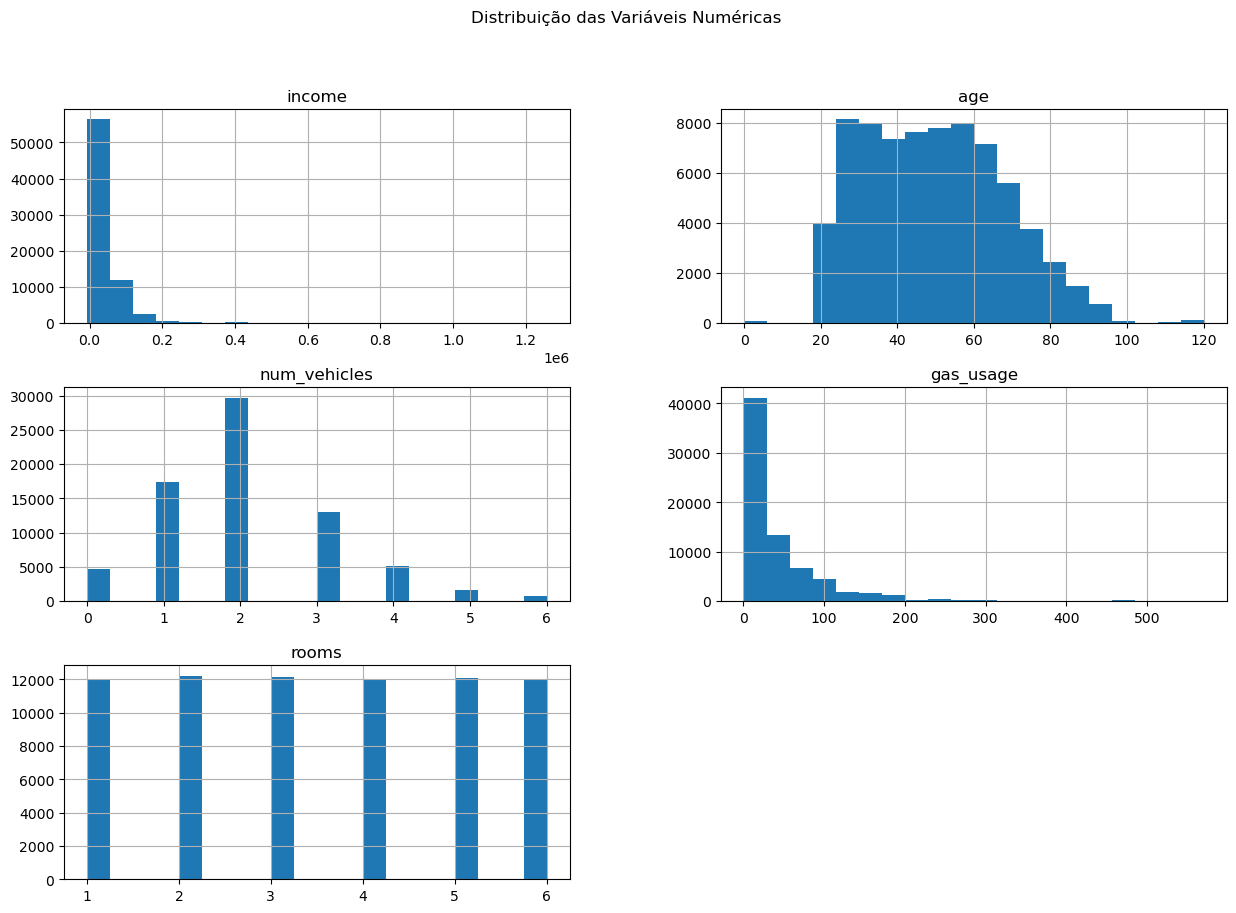

In [7]:
num_columns = ['income', 'age', 'num_vehicles', 'gas_usage', 'rooms']
df[num_columns].hist(bins=20, figsize=(15, 10))


plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

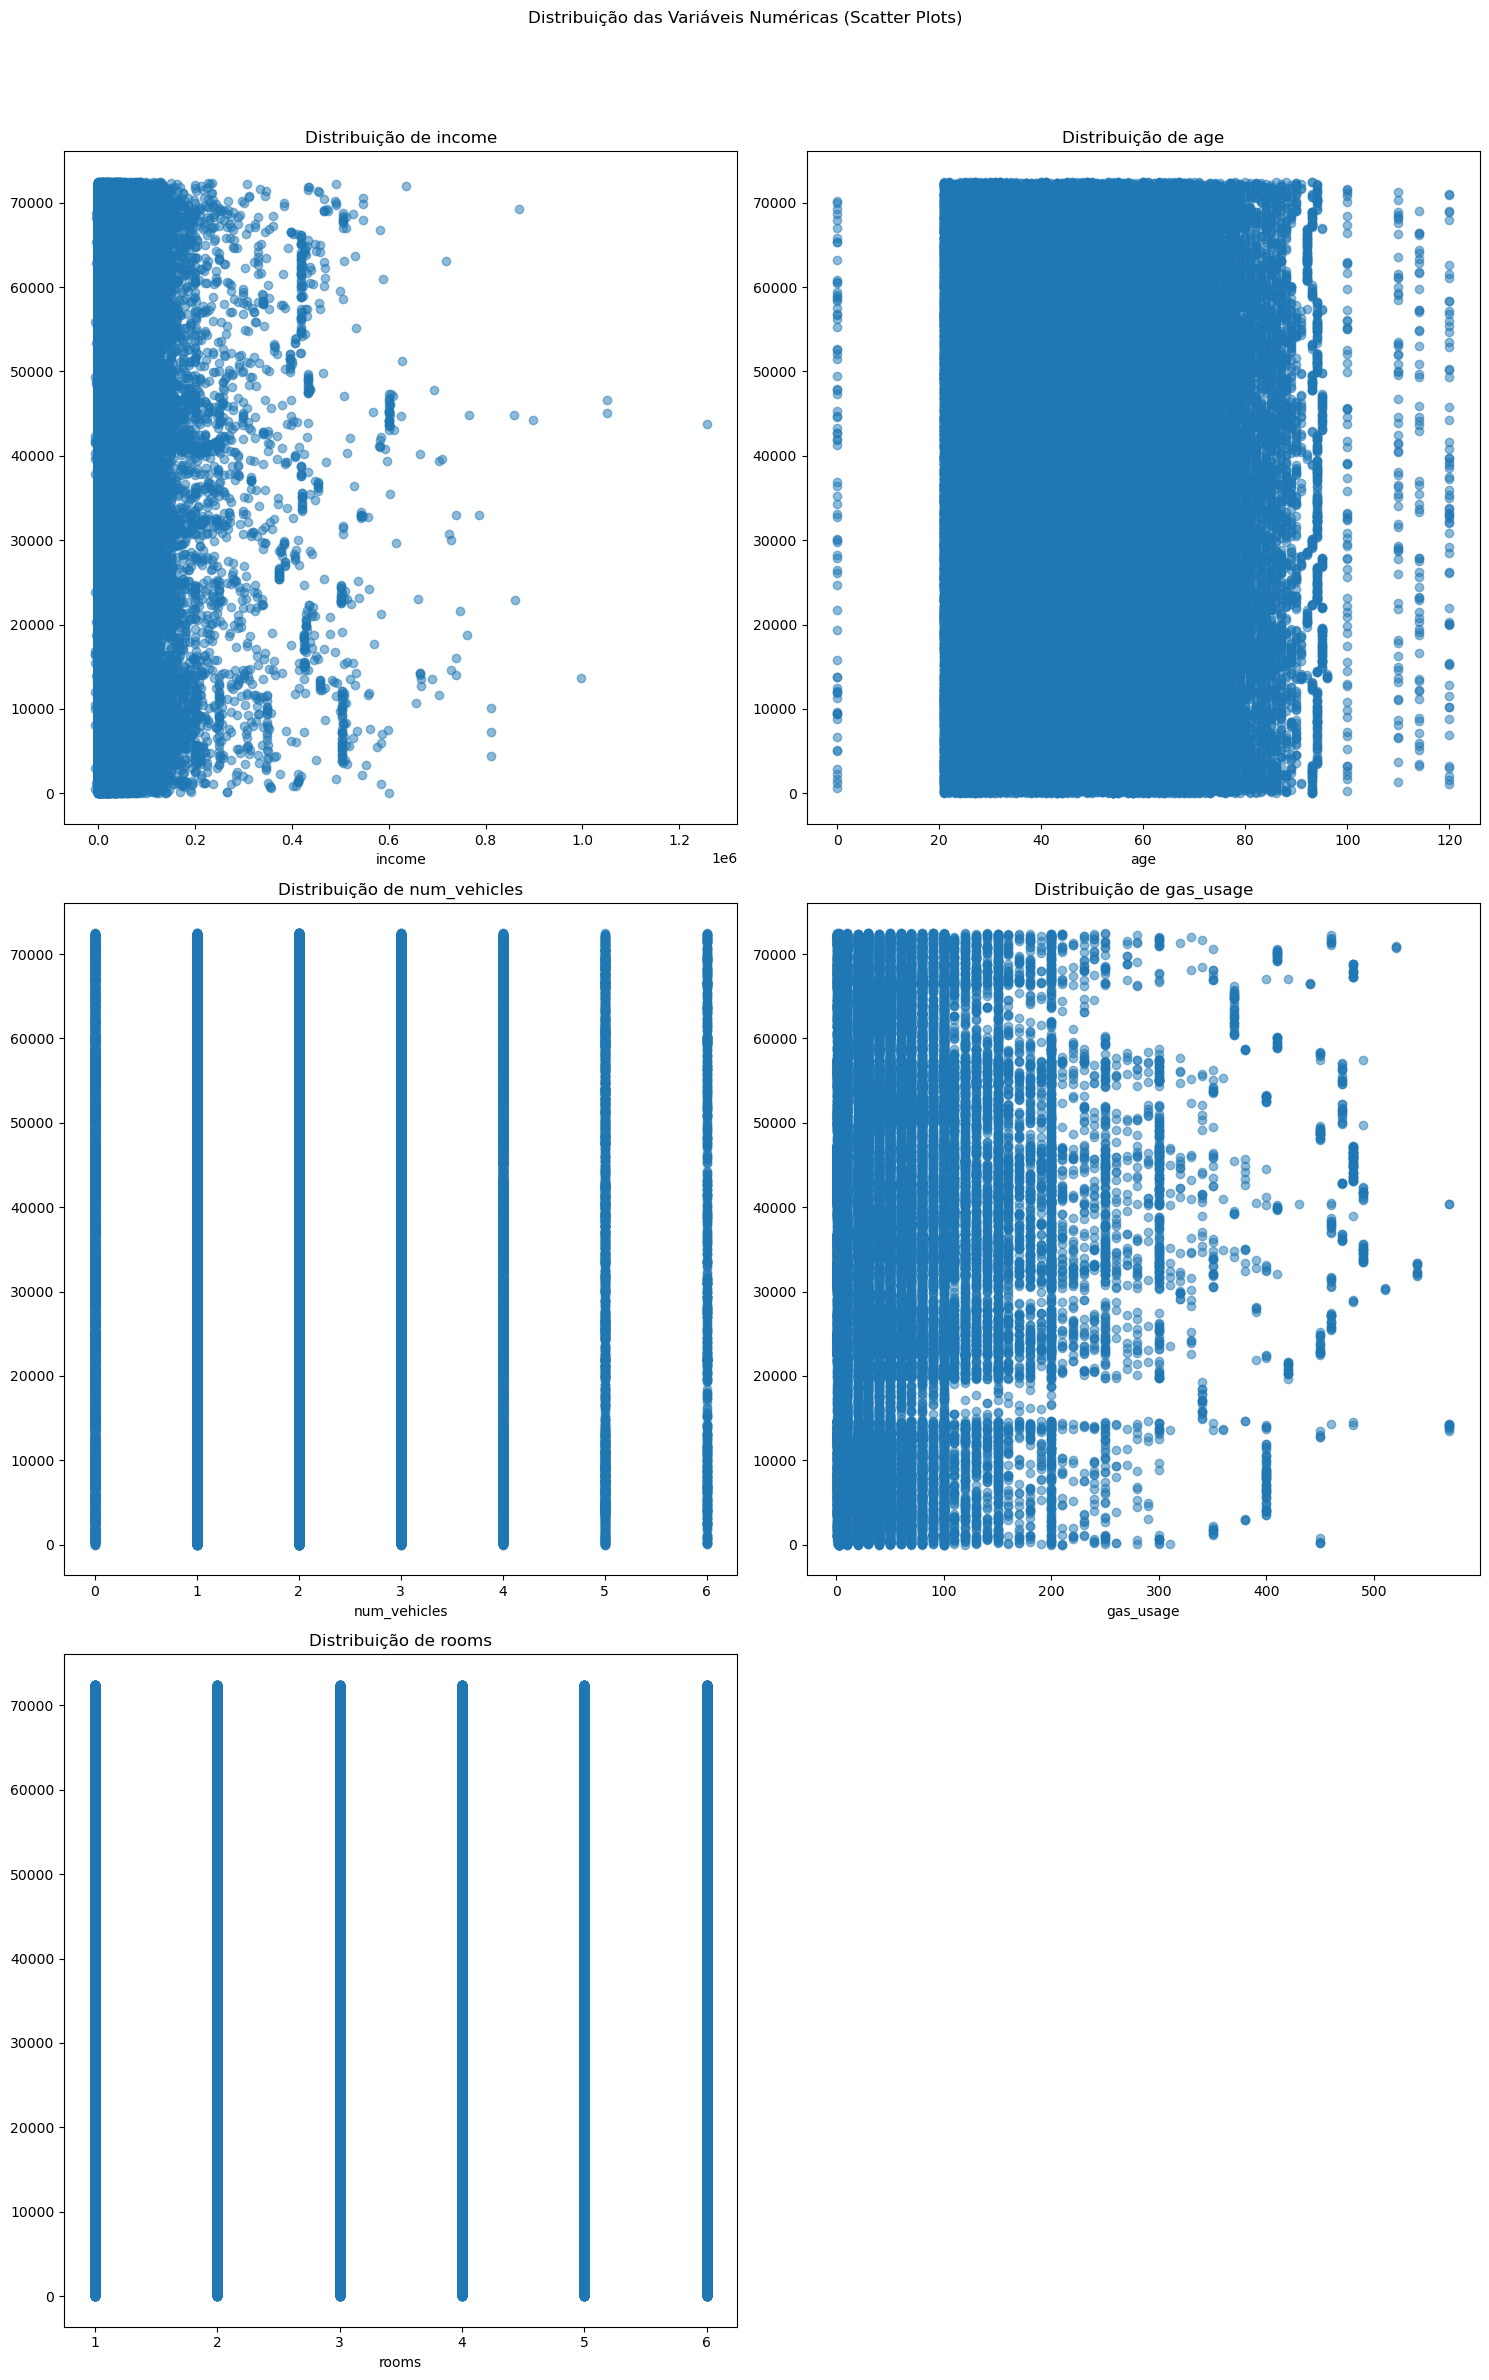

In [8]:
plt.figure(figsize=(15, 25))

# Criar um scatter plot para cada coluna numérica
for i, col in enumerate(num_columns, 1):
    plt.subplot(3, 2, i)
    plt.scatter(df[col], df.index, alpha=0.5)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)

plt.suptitle('Distribuição das Variáveis Numéricas (Scatter Plots)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# outliers que temos de tratar

- no **income** os valores são `X * 10^6` , logo podem haver pessoas que tenham metido o income mensal (?) ou pessoas que tenham metido o income anual (?) -> convém definirmos um valor (tipo: salário minimo/médio dos EUA * 12, e se o income for menor que isso, então multiplicamos por 12, pois é sinal que essa pessoa meteu o mensal...podemos é dar uma margem para partimes ou assim...)
- na **idade** creio que há imensas pessoas perto de 120 anos, isso é normal (?) , e algumas com zero anos (?) -> e no gráfico mais a baixo vemos pessoas com zero anos a receberem income, como vamos tratar disso (?), ou seja, se tiverem zero anos e forem casadas... tiverem casa... income... então metemos a média. se forem com zero anos e tiverem tudo como se forem um bebé, ta tudo bem.
- **nr de veiculos** parece ok, vemos que as colunas 1,2,3 e 4 são bem marcadas, mas 5 e 6 já começam a ficar menos carregadas
- **uso do gas** parece que temos ali uns outliers à direita.. se calhar convém verificarmos se eles se relacionam com a casa ser grande / ter muitos quartos / têm muitaos carros... se isso se verificar é porque têm boa vida financeira, se não se verificar são outliers...
- o **nr de quartos** parece me tudo bem

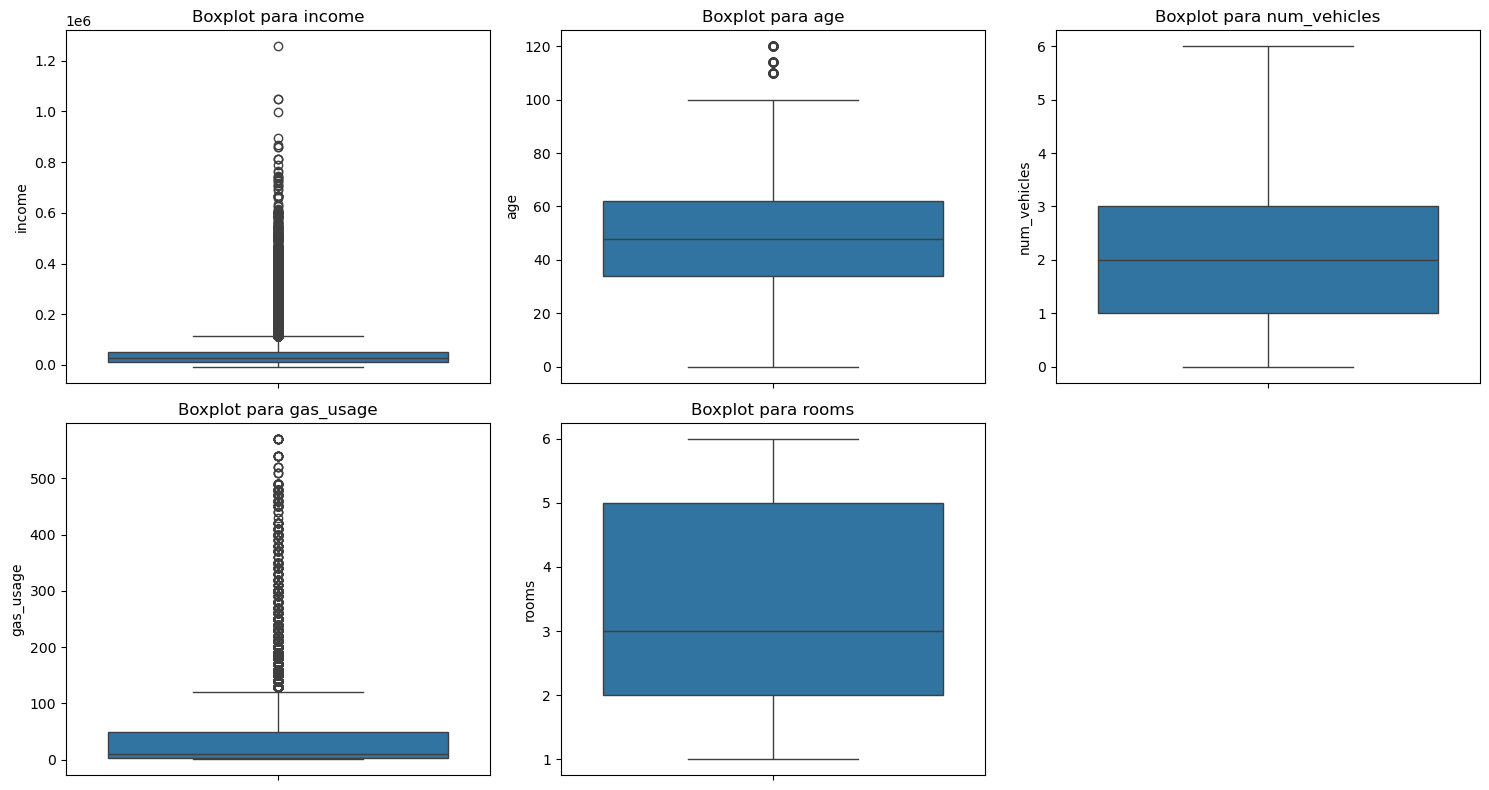

In [9]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot para {col}')
plt.tight_layout()
plt.show()

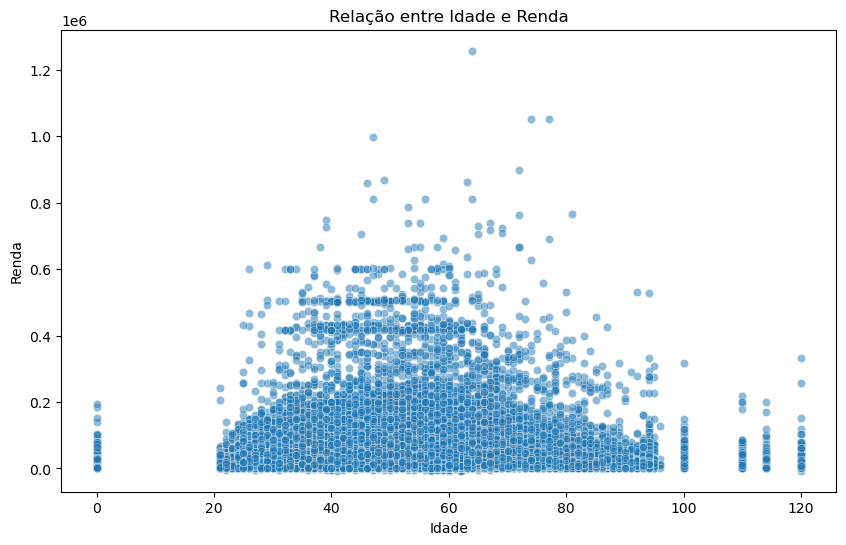

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='income', alpha=0.5)
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()

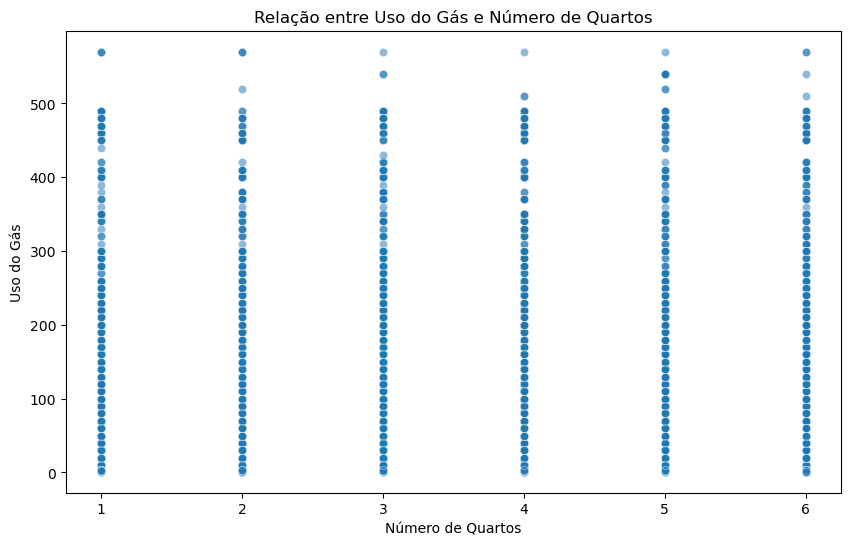

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='rooms', y='gas_usage', alpha=0.5)
plt.title('Relação entre Uso do Gás e Número de Quartos')
plt.xlabel('Número de Quartos')
plt.ylabel('Uso do Gás')
plt.show()

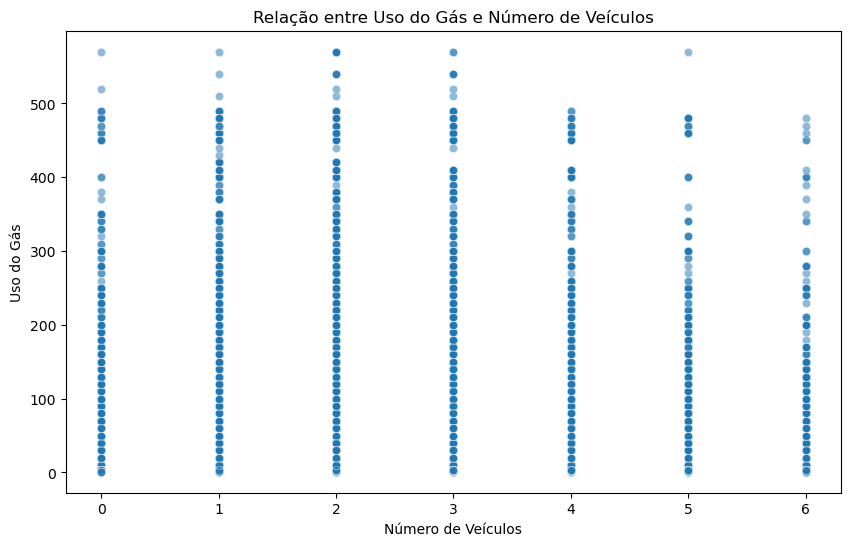

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='num_vehicles', y='gas_usage', alpha=0.5)
plt.title('Relação entre Uso do Gás e Número de Veículos')
plt.xlabel('Número de Veículos')
plt.ylabel('Uso do Gás')
plt.show()

# outliers do gas

Aqui parece que se confirmam que há outliers no uso do gas, se calhar é melhor lidarmos com eles

- pessoas que tenham :
    - 0 / 1 / 2 quartos && 0 / 1 carros -> não devem ter gás a cima de 450 (?)
    - 3 / 4 / 5 quartos && 0 / 1 / 2 / 3 carros -> não devem ter gás a cima de 500 (?)

# algo deste genero (?) -> se concordarem

In [13]:
condition1 = (df['rooms'].isin([0, 1, 2])) & (df['num_vehicles'].isin([0, 1])) & (df['gas_usage'] > 450)
df.loc[condition1, 'gas_usage'] = 450

condition2 = (df['rooms'].isin([3, 4, 5])) & (df['num_vehicles'].isin([0, 1, 2, 3])) & (df['gas_usage'] > 500)
df.loc[condition2, 'gas_usage'] = 500

print("Valores de gas_usage após tratamento:")
print(df['gas_usage'].describe())


Valores de gas_usage após tratamento:
count    72458.000000
mean        40.490974
std         62.492762
min          1.000000
25%          3.000000
50%         10.000000
75%         50.000000
max        570.000000
Name: gas_usage, dtype: float64


## ou
ou então podemos aplicar:
- uma transformação logaritmica 
- simplesmente remove-los

(oq eu fiz foi trocar pelo valor máximo)

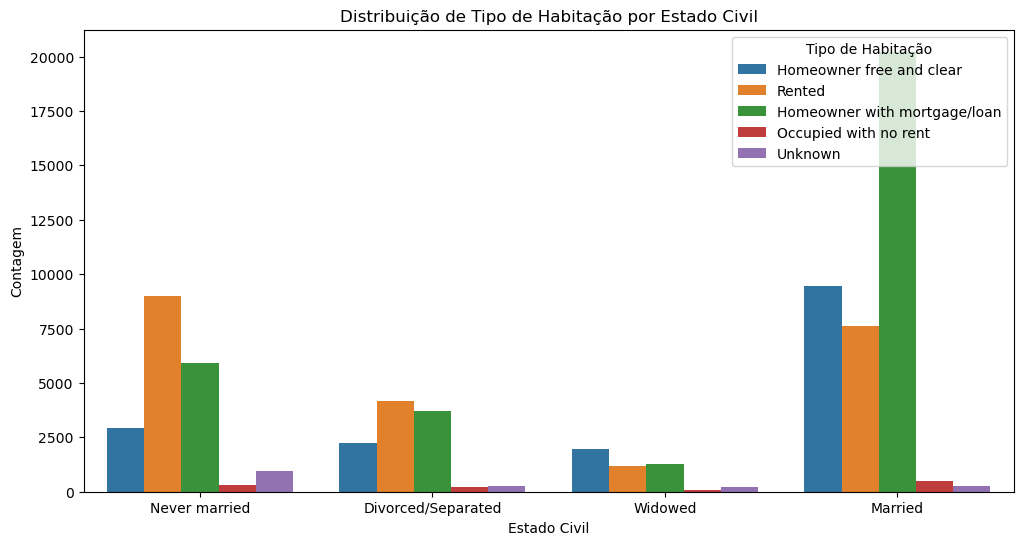

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='marital_status', hue='housing_type')
plt.title('Distribuição de Tipo de Habitação por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')
plt.legend(title='Tipo de Habitação', loc='upper right')
plt.show()

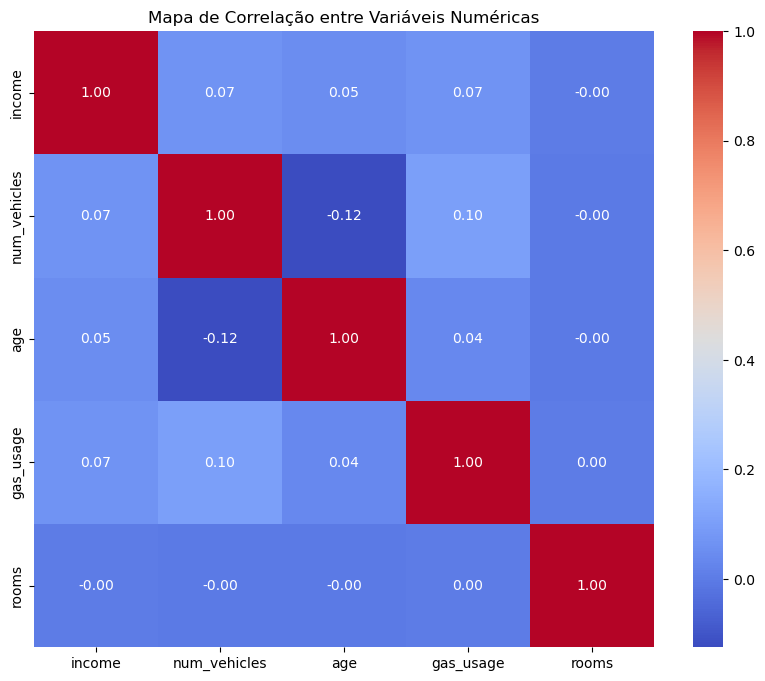

In [15]:
numeric_columns = df.select_dtypes(include=[np.number])
correlation = numeric_columns.corr()

# correlação entre variáveis numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()


/var/folders/vl/y_41x5_50d55msx55mh9_lk00000gn/T/ipykernel_69365/2988973052.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='housing_type', y='income', ci=None)


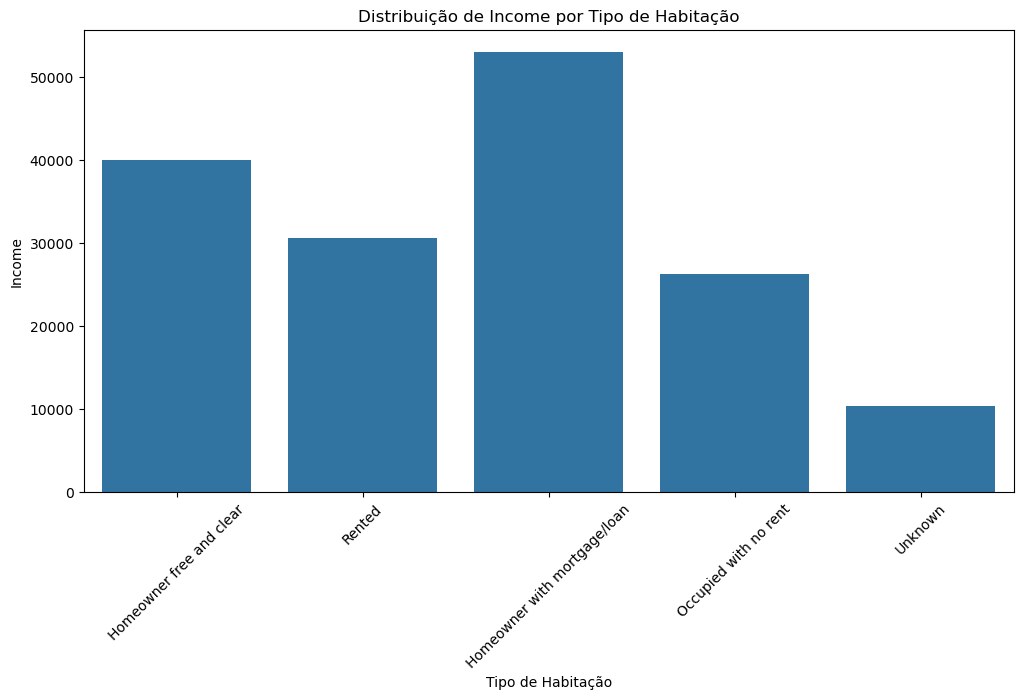

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='housing_type', y='income', ci=None)
plt.title('Distribuição de Income por Tipo de Habitação')
plt.xlabel('Tipo de Habitação')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

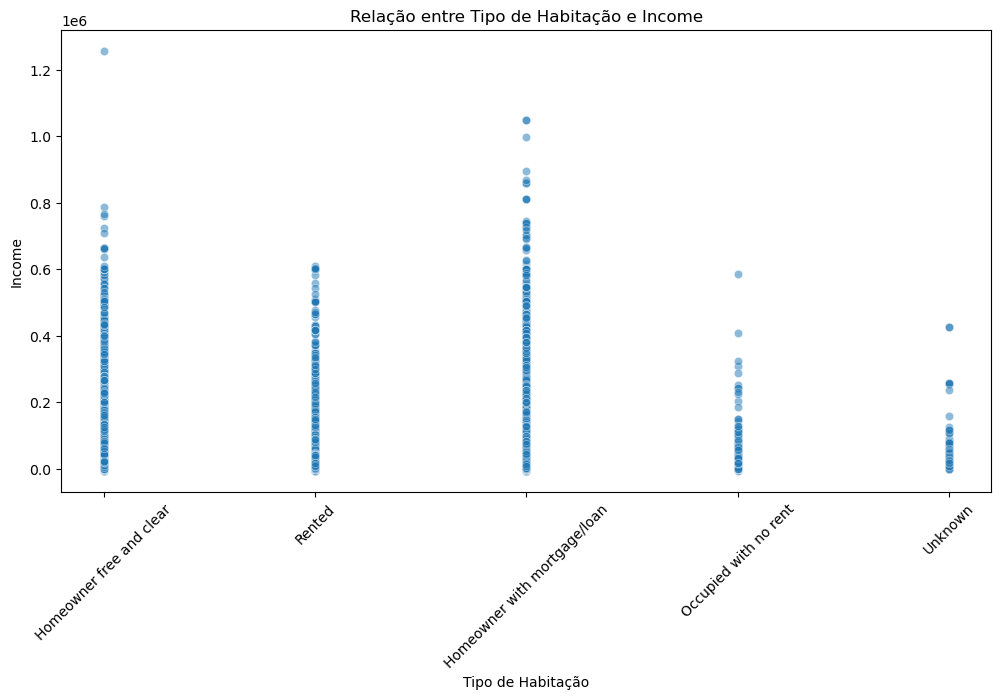

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='housing_type', y='income', alpha=0.5)
plt.title('Relação entre Tipo de Habitação e Income')
plt.xlabel('Tipo de Habitação')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.show()

# começar a preparar os modelos

#### começamos com um problema, que há uma grande disparidade entre o numero de true e o numero de falses

In [18]:
print(df['health_ins'].value_counts())

health_ins
True     65553
False     6905
Name: count, dtype: int64


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# passar colunas boolean para strings
for column in df.select_dtypes(include=['bool']).columns:
    df[column] = df[column].astype(str)

# verificar se ta tudo em strings
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)

# encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# separar as features e a variável alvo
X = df.drop(columns=['health_ins'])
y = df['health_ins']

# dividir os dados em treino e teste (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}')
print(f'K-Nearest Neighbors F1 Score: {f1_knn:.2f}')

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')
print(f'Decision Tree F1 Score: {f1_dt:.2f}')

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc) 
print(f'Support Vector Machine Accuracy: {accuracy_svc:.2f}')
print(f'Support Vector Machine F1 Score: {f1_svc:.2f}')

K-Nearest Neighbors Accuracy: 0.89
K-Nearest Neighbors F1 Score: 0.94
Decision Tree Accuracy: 0.84
Decision Tree F1 Score: 0.91
Support Vector Machine Accuracy: 0.90
Support Vector Machine F1 Score: 0.95


# tentar corrigir a diferença entre true / falses 

### com smote

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# ver como ficaram as classes
print("Distribuição das classes após SMOTE:")
print(y_resampled.value_counts()) 


Distribuição das classes após SMOTE:
health_ins
1    52455
0    52455
Name: count, dtype: int64


# aplicar novamente os modelos

In [ ]:
knn.fit(X_resampled, y_resampled)
y_pred_knn_resampled = knn.predict(X_test)
accuracy_knn_resampled = accuracy_score(y_test, y_pred_knn_resampled)
f1_knn_resampled = f1_score(y_test, y_pred_knn_resampled)
print(f'K-Nearest Neighbors Accuracy (Resampled): {accuracy_knn_resampled:.2f}')
print(f'K-Nearest Neighbors F1 Score (Resampled): {f1_knn_resampled:.2f}')

dt.fit(X_resampled, y_resampled)
y_pred_dt_resampled = dt.predict(X_test)
accuracy_dt_resampled = accuracy_score(y_test, y_pred_dt_resampled)
f1_dt_resampled = f1_score(y_test, y_pred_dt_resampled)
print(f'Decision Tree Accuracy (Resampled): {accuracy_dt_resampled:.2f}')
print(f'Decision Tree F1 Score (Resampled): {f1_dt_resampled:.2f}')

svc.fit(X_resampled, y_resampled)
y_pred_svc_resampled = svc.predict(X_test)
accuracy_svc_resampled = accuracy_score(y_test, y_pred_svc_resampled)
f1_svc_resampled = f1_score(y_test, y_pred_svc_resampled)
print(f'Support Vector Machine Accuracy (Resampled): {accuracy_svc_resampled:.2f}')
print(f'Support Vector Machine F1 Score (Resampled): {f1_svc_resampled:.2f}')

K-Nearest Neighbors Accuracy (Resampled): 0.73
K-Nearest Neighbors F1 Score (Resampled): 0.84
Decision Tree Accuracy (Resampled): 0.82
Decision Tree F1 Score (Resampled): 0.90


### com undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print("Distribuição após Under-sampling:")
print(y_resampled.value_counts())


Distribuição após Under-sampling:
0    5511
1    5511
Name: health_ins, dtype: int64


In [ ]:
knn.fit(X_resampled, y_resampled)
y_pred_knn_resampled = knn.predict(X_test)
accuracy_knn_resampled = accuracy_score(y_test, y_pred_knn_resampled)
f1_knn_resampled = f1_score(y_test, y_pred_knn_resampled)
print(f'K-Nearest Neighbors Accuracy (Resampled): {accuracy_knn_resampled:.2f}')
print(f'K-Nearest Neighbors F1 Score (Resampled): {f1_knn_resampled:.2f}')

dt.fit(X_resampled, y_resampled)
y_pred_dt_resampled = dt.predict(X_test)
accuracy_dt_resampled = accuracy_score(y_test, y_pred_dt_resampled)
f1_dt_resampled = f1_score(y_test, y_pred_dt_resampled)
print(f'Decision Tree Accuracy (Resampled): {accuracy_dt_resampled:.2f}')
print(f'Decision Tree F1 Score (Resampled): {f1_dt_resampled:.2f}')

svc.fit(X_resampled, y_resampled)
y_pred_svc_resampled = svc.predict(X_test)
accuracy_svc_resampled = accuracy_score(y_test, y_pred_svc_resampled)
f1_svc_resampled = f1_score(y_test, y_pred_svc_resampled)
print(f'Support Vector Machine Accuracy (Resampled): {accuracy_svc_resampled:.2f}')
print(f'Support Vector Machine F1 Score (Resampled): {f1_svc_resampled:.2f}')

K-Nearest Neighbors Accuracy (Resampled): 0.63
K-Nearest Neighbors F1 Score (Resampled): 0.75
Decision Tree Accuracy (Resampled): 0.66
Decision Tree F1 Score (Resampled): 0.78
Support Vector Machine Accuracy (Resampled): 0.54
Support Vector Machine F1 Score (Resampled): 0.66


### com oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print("Distribuição após Over-sampling:")
print(y_resampled.value_counts())


Distribuição após Over-sampling:
1    52455
0    52455
Name: health_ins, dtype: int64


In [ ]:
knn.fit(X_resampled, y_resampled)
y_pred_knn_resampled = knn.predict(X_test)
accuracy_knn_resampled = accuracy_score(y_test, y_pred_knn_resampled)
f1_knn_resampled = f1_score(y_test, y_pred_knn_resampled)
print(f'K-Nearest Neighbors Accuracy (Resampled): {accuracy_knn_resampled:.2f}')
print(f'K-Nearest Neighbors F1 Score (Resampled): {f1_knn_resampled:.2f}')

dt.fit(X_resampled, y_resampled)
y_pred_dt_resampled = dt.predict(X_test)
accuracy_dt_resampled = accuracy_score(y_test, y_pred_dt_resampled)
f1_dt_resampled = f1_score(y_test, y_pred_dt_resampled)
print(f'Decision Tree Accuracy (Resampled): {accuracy_dt_resampled:.2f}')
print(f'Decision Tree F1 Score (Resampled): {f1_dt_resampled:.2f}')

svc.fit(X_resampled, y_resampled)
y_pred_svc_resampled = svc.predict(X_test)
accuracy_svc_resampled = accuracy_score(y_test, y_pred_svc_resampled)
f1_svc_resampled = f1_score(y_test, y_pred_svc_resampled)
print(f'Support Vector Machine Accuracy (Resampled): {accuracy_svc_resampled:.2f}')
print(f'Support Vector Machine F1 Score (Resampled): {f1_svc_resampled:.2f}')

K-Nearest Neighbors Accuracy (Resampled): 0.76
K-Nearest Neighbors F1 Score (Resampled): 0.86
Decision Tree Accuracy (Resampled): 0.85
Decision Tree F1 Score (Resampled): 0.92
Support Vector Machine Accuracy (Resampled): 0.53
Support Vector Machine F1 Score (Resampled): 0.66
